## Intrest behind exploring the dataset.

Determining the main factors involved in calclating the interest rate. 

## Dataset Structure

The dataset includes 113,937 rows (loan), 81 variables. Most of the columns are numeric, also there are some date/time columns. BorrowerAPR, BorrowerRate and DebtToIncomeRatio denote percentages and are represneted by decimals. There are also some ordered categorical variables like CreditGrade ProsperRating(Alpha). The ProsperRating is also represented with a numeric equivalent (0 - 7). ProsperScore that determines a risk score(1 - 10) for the loan.

The CreditGrade scale: NC, HR, E, D, C, B, A, AA The ProsperRating (Alpha) scale : N/A, HR, E, D, C, B, A, AA Both have simillar ratings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


## Borrower's Rate Distribution 

BorrowerRate follows a noraml distribution with a slight left skew<br>
There's a large spike around the 30% value

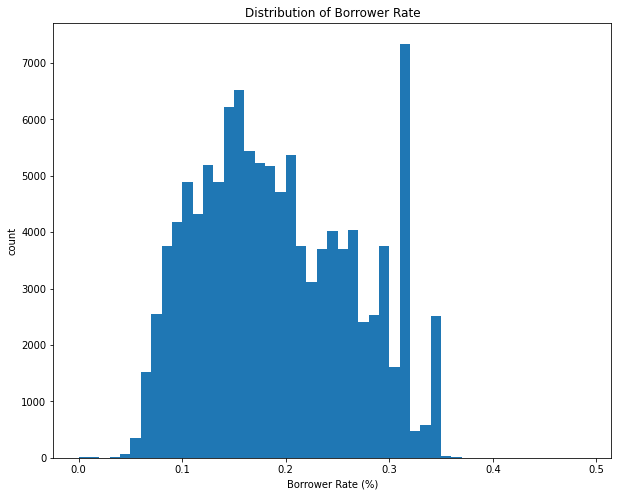

In [4]:
binsRate = np.arange(df.BorrowerRate.min(), df.BorrowerRate.max(), 0.01)

plt.figure(figsize = [10, 8])

plt.hist(data=df, x='BorrowerRate', bins=binsRate)
plt.xlabel('Borrower Rate (%)');
plt.ylabel('count')
plt.title('Distribution of Borrower Rate');

## Attributes affecting the interest rate of a loan

ProsperRating (numeric) is highly correlated suggesting it affects the interest direclty. <br>
The ProsperScore is a is correlated, but not a high correlation.<br>
And the DebtToIncomeRatio has no correlated with the interest rate.

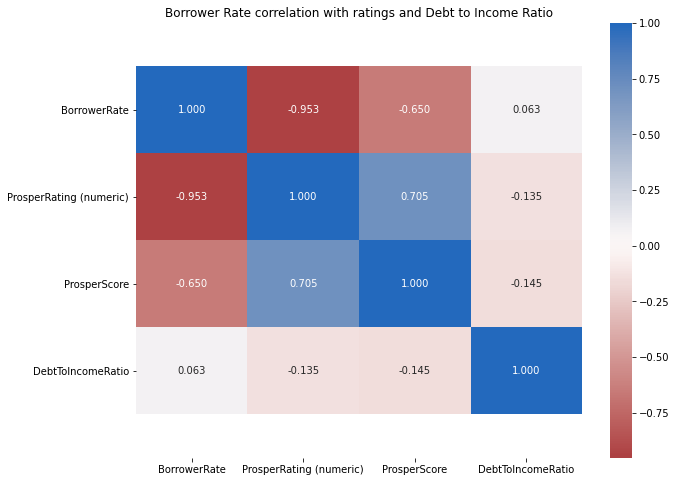

In [5]:
# https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986
df = df[['BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore', 'DebtToIncomeRatio']]

plt.figure(figsize = [10, 8])
sb.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Borrower Rate correlation with ratings and Debt to Income Ratio')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0);
plt.show() 

## ProsperScore is highly correlated to BorrowerRate, but ProsperRate isn't, why ?


This pointplot shows how the ProsperScore is distributed acorss the different credit risk scores in relation to BorrowerRate.<br> It shows that ProsperScore might be using different criteria than the other credit risk scores, as suggested before. This can be further analyzed.

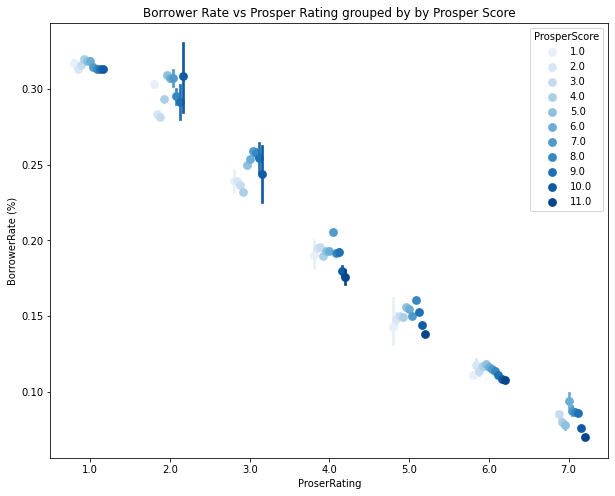

In [6]:
fig = plt.figure(figsize=[10,8])

ax = sb.pointplot(data=df, x='ProsperRating (numeric)', y='BorrowerRate', hue='ProsperScore',
                  dodge=0.4, linestyles='', palette='Blues');
plt.title('Borrower Rate vs Prosper Rating grouped by by Prosper Score')
plt.xlabel('ProserRating');
plt.ylabel('BorrowerRate (%)');

## What can you do to get a low interst rate ?

Build a good credit score (the higher the better).<br>
Plan on making the loan term as short as possible.
